<a href="https://colab.research.google.com/github/amna-javed13/internsavy-internship/blob/main/Graduate_Admissions_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:**

In this, project I deal with problem of predicting admission chances in universities. Based on the historical data of students admitted into the university. the chances of current students  will be predicted. Machine learning algorithms will be used for solving this problem. I follow several steps in tackling the problem. These steps are:

•	Understanding historical data

•	Exploratory data analysis

•	Model Building

•	Model Evaluation


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Importing Dataset**

In [2]:
data=pd.read_csv(r"/content/Admission_Predict_Ver1.1.csv")

In [3]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [8]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


•	Chance of admit is the target variable or the one which has to be predicted.

•	Except serial number first the 7 columns are predictor variables


**Variable Identification**

In [9]:
data.describe()



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


•	We can understand preliminary behaviour of numerical data using describe function

•	We can know the distribution of data through mean, maximum, minimum and standard deviation.

•	For example CGPA has min=6 and max=9.92.

•	Quarties give an idea about outliers.



In [10]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

•	There are no categorical or text variables.

**Exploratory Data Analysis**

**Missing values**


In [11]:
data.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

•	Isnull function checks for the null values in the dataset.

•	Sum function gives the total number of missing or NaN values in a column.

•	There are no missing values present in the dataset.


**Identifying and Removing Outliers**

**•	Outliers Visualization**

<Axes: >

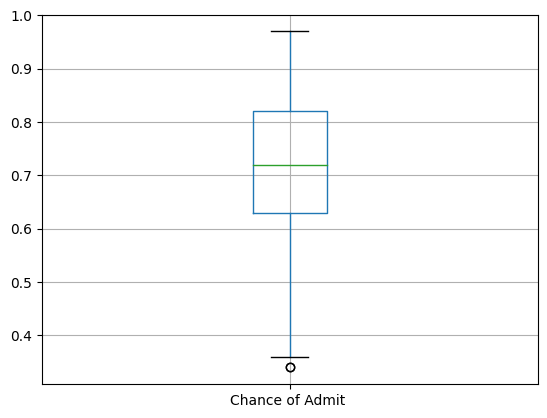

In [13]:
data.boxplot(column =['Chance of Admit '])

<Axes: >

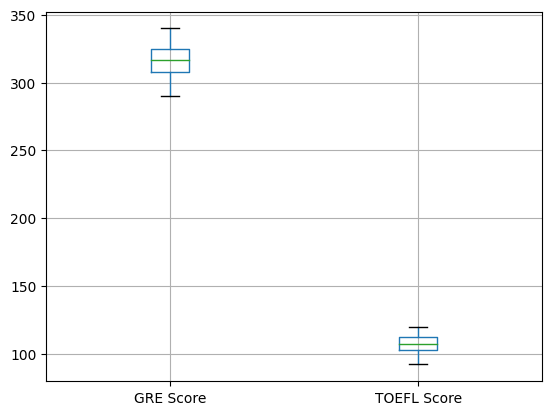

In [14]:
data.boxplot(column =['GRE Score', 'TOEFL Score'])

<Axes: >

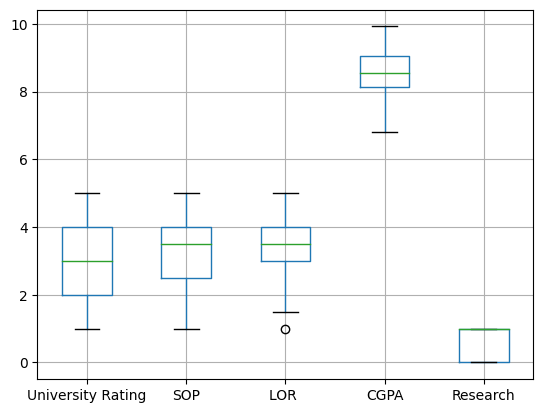

In [15]:
data.boxplot(column=['University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'])

From the  boxplots it is evident that LOR and Chance of Admit have the outlier values.

**•	Removing Outliers using IQR method**

In [16]:
data1=data.copy()
data1.drop(['Serial No.'], axis=1, inplace = True)

In [17]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [18]:
df_out1 = data1[((data1 < (Q1 - 1.5 * IQR)) |(data1> (Q3 + 1.5 * IQR))).any(axis=1)]
df_out1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


•	Data has three outliers as shown above

In [19]:
df_out1 = data1[~((data1 < (Q1 - 1.5 * IQR)) |(data1> (Q3 + 1.5 * IQR))).any(axis=1)]
data=df_out1.copy()
print(data.shape)

(497, 8)


•	Outliers are removed from the data

**Univariate analysis**

**Methods explored depends in the type of variable.**


Text(0.5, 0, 'Chances')

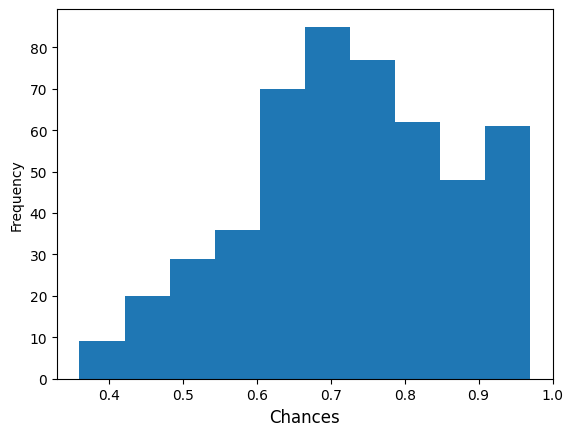

In [20]:

data['Chance of Admit '].plot.hist()
plt.xlabel('Chances', fontsize=12)




Text(0.5, 0, 'Rating')

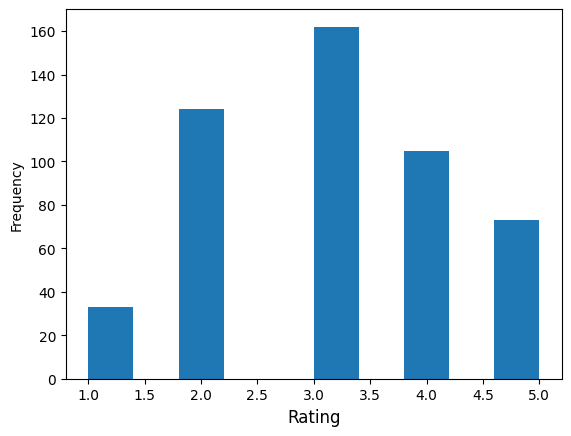

In [21]:
data['University Rating'].plot.hist()
plt.xlabel('Rating', fontsize=12)

•	Less number of students getting low rating

•	Maximum students getting between 3 to 3.5 rating



In [22]:
data['Research'].value_counts()

1    280
0    217
Name: Research, dtype: int64

•	280 students have the research experience and 217 student haven’t.

**Bivariate analysis**

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

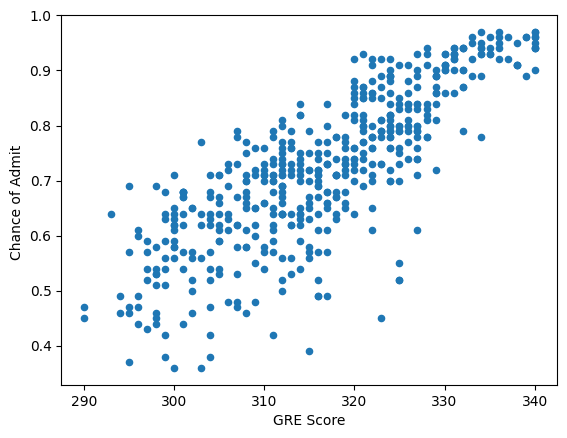

In [23]:
data.plot.scatter('GRE Score', 'Chance of Admit ')

•	GRE Score has strong positive correlation with target variable.

•	More  the GRE Score, More Possibility to get admit.


In [24]:
data['GRE Score'].corr(data["Chance of Admit "])

0.80759358658696

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

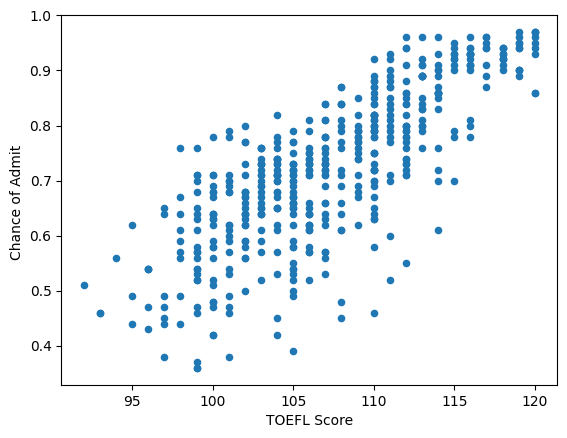

In [25]:

data.plot.scatter('TOEFL Score', 'Chance of Admit ')

In [26]:
data['TOEFL Score'].corr(data["Chance of Admit "])

0.7881282679383222

•	Compare to the  GRE, TOEFL is less correlation with Chance of Admit

•	TOEFL Score also having positive correlation with Chance of Admit


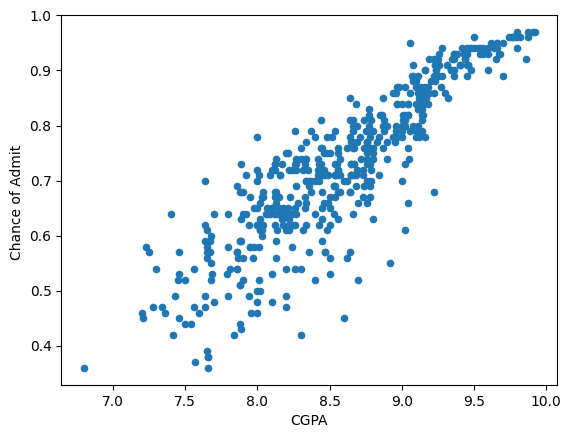

In [27]:
a=data.plot.scatter('CGPA', 'Chance of Admit ')

In [28]:
data['CGPA'].corr(data["Chance of Admit "])

0.8831214773197416

•	Maximum CGPA defines the Chance of Admit

<Axes: xlabel='CGPA', ylabel='TOEFL Score'>

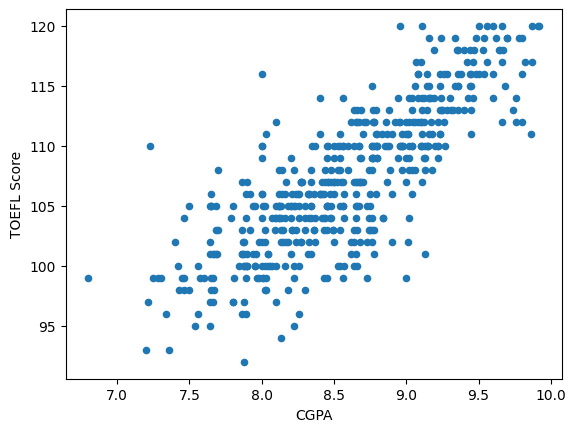

In [29]:
data.plot.scatter('CGPA', 'TOEFL Score')

In [30]:
data['CGPA'].corr(data["TOEFL Score"])

0.8072817048403574

In [31]:
data['CGPA'].corr(data["GRE Score"])

0.823738728738834

•	More the CGPA, student definatly  get a good score in GRE and TOEFL



**Building The Model**
  
In a model building part I use a “sklearn” library. Sklearn is used in:

•	Preprocessing Data

•	Model Selection and Training

•	Prediction from model

•	Model Evaluation




**Preprocessing data**

In [32]:
x = data.drop(['Chance of Admit '], axis=1)
y = data['Chance of Admit ']
x.shape, y.shape

((497, 7), (497,))

**Segragating variables: Independent and Dependant Variables**

•	Using drop command columns subject and Activity are skipped.

•	X contains all the features except target variable ‘Chance of Admit’

•	Y is the target variable containing  ‘Chance of Admit’



In [33]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

•	train_test_split  function separate dataset into training data and test data

•	Data is split randomly using the seed value of random_state

•	By default training data will be 80% of orginial data and testing data is 20% of dataset.

•	Random_state can be any integer, and acts as a seed to produce same sampling for every run.



**Model Selection and Training **


In [34]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(train_x, train_y)
predictions = pipeline.predict(test_x)
lr = LinearRegression()





In [36]:
lr.fit(train_x, train_y)

LinearRegression()

•	**Ir** is an instance of model object  linear Regression model *Ir*

•	The above command creates and initializes the linear regression model  *Ir.*


In [37]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Test Mean Absolute Error for training data  ', k)

Test Mean Absolute Error for training data   0.039940705622531575


•	predict method is used to predict output for a given input.

•	Here train_x is the input data.

•	The predicted output is stored in train_predict variable.

•	mae function give error between actual output and predicted output.



**Prediction from Model**

In [38]:
lr.fit(train_x, train_y)

test_predict = lr.predict(test_x)

from sklearn.metrics import mean_absolute_error as mae
k = mae(test_predict, test_y)
print('Test Mean Absolute Error for testing data: ', k)

Test Mean Absolute Error for testing data:  0.04626540969766835


•	Here  test_x  is the input data that is not seen by the model.

•	The predicted output is stored in test_predict variable.



**Model Evaluation**

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
pred_train = lr.predict(train_x)
train_score = np.sqrt(mean_squared_error(train_y,pred_train))
print(train_score)

0.05671293520627018


In [41]:
pred_test = lr.predict(test_x)
test_score=np.sqrt(mean_squared_error(test_predict, test_y))
print(test_score)

0.06403558473750123


In [42]:
print('Training score:', train_score)
print('Validation score:', test_score)

Training score: 0.05671293520627018
Validation score: 0.06403558473750123


•	Next question is assessing how well the trained model is predicting the chance of admision of students.

•	For evaluation of model different error metrics are used.

•	Mean Absolute error and Mean squared error are the two error metrics commonly used in regression.

•	Here the Mean square error for both training and testing data is obtained.

•	The error values are very low indicating good prediction capability of the trained model.


**Conclusions**

In [44]:
test=lr.score(test_x, test_y)*100
train=lr.score(train_x, train_y)*100
print("Accuracy on train set:", train)
print("Accuracy on test set:", test)

Accuracy on train set: 82.93528397844712
Accuracy on test set: 79.45576280952008


**Got 82% Accuracy**